In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
print("hello")

hello


In [17]:
df=pd.read_csv('Zomato data .csv')

In [18]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [19]:
df.size

1036

In [20]:
def handlerate(values):
    values=str(values).split('/')
    values=values[0];
    return float(values)
df['rate']=df['rate'].apply(handlerate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [22]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'type of restaurants')

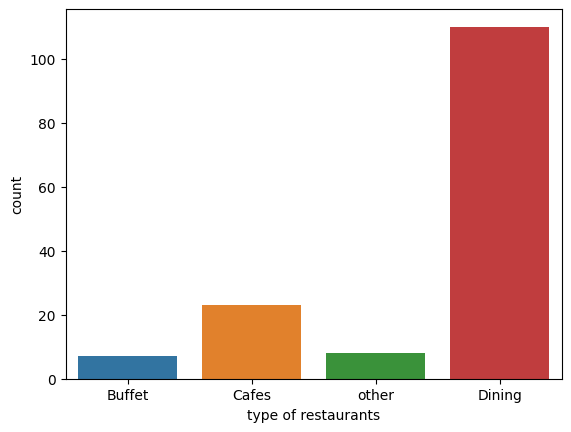

In [23]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('type of restaurants')

# Conclusion :-majority of restaurant belongs to Dining

Text(0, 0.5, 'votes')

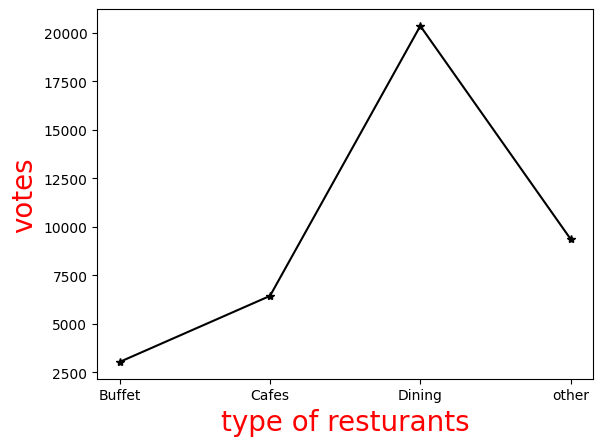

In [30]:
grouped_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result, c='black',marker='*')
plt.xlabel("type of resturants", c='red',size=20)
plt.ylabel("votes", c='red',size=20)

# Conclusion :- dinning resturants has received maximum votes

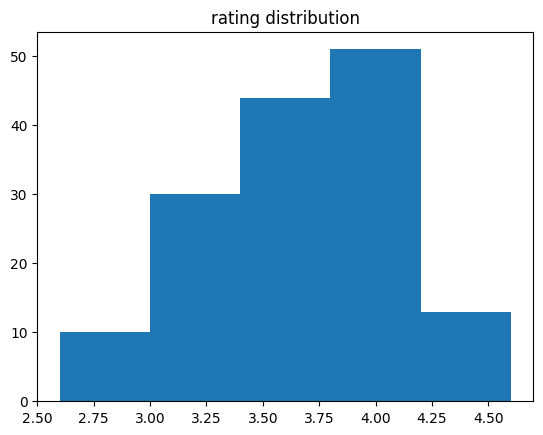

In [31]:
plt.hist(df['rate'],bins=5)
plt.title("rating distribution")
plt.show()

# Conclusion :- majority resturants got rating from 3.5 to 4

# average order spending by couples

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

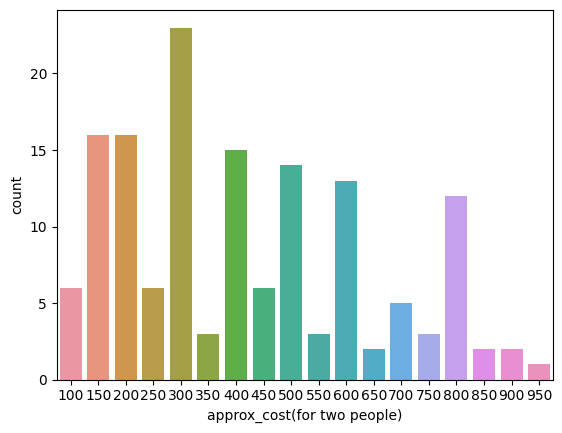

In [32]:
coupled_data=df['approx_cost(for two people)']
sns.countplot(x=coupled_data)

# Conclusion :-majority of couples prefer restaurants with an approximation cost of 300 ruppes

# which mode receives maximum rating

<Axes: xlabel='online_order', ylabel='rate'>

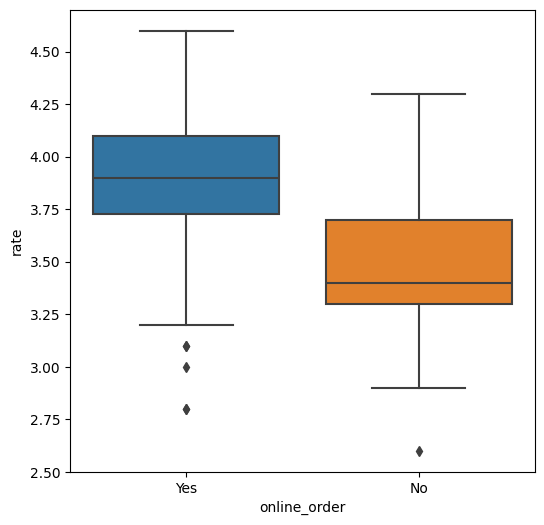

In [35]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate', data=df)

# Conclusion :-online orders receive higher ratings

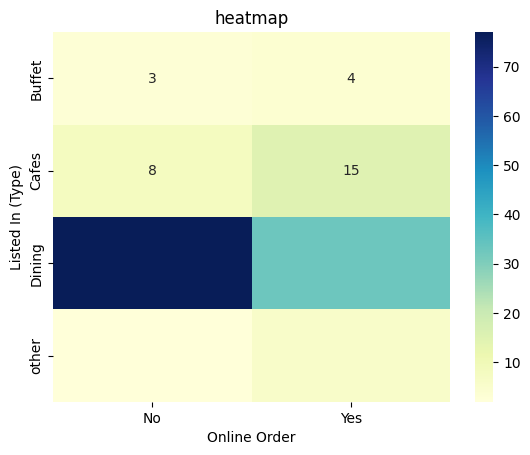

In [40]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.title("heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

# Conclusion :-Dining restaurants primarily accept offline orders, whereas cafes primarily receives online orders.this suggest that client prefer to place order in person at restaurants but prefer online ordering at cafes.